In [4]:
# Importamos las librerías

import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [7]:
%pwd

'/home/cygnus/Documentos/SasildeLeon/tiktok'

In [15]:
# Leemos los archvios .csv de los comentarios

df_posts = pd.read_csv("tiktok_posts_sasil.csv", usecols=["video-count", "tiktok-j2a19r-SpanText",
                                                          "tiktok-1p6dp51-StrongText", "tiktok-j2a19r-SpanText 2"])

df_posts = df_posts.fillna("")

df_posts["texto"] = df_posts['tiktok-j2a19r-SpanText'] + ' ' + df_posts['tiktok-j2a19r-SpanText 2'] + ' ' + df_posts['tiktok-1p6dp51-StrongText']
df_posts

,video-count,tiktok-j2a19r-SpanText,tiktok-j2a19r-SpanText 2,tiktok-1p6dp51-StrongText,texto
0,3198,¡Por la continuidad de la transformación en Ch...,Vamos al llamado histórico e inédito de nuestr...,#estiempodetransformacion,¡Por la continuidad de la transformación en Ch...
1,7841,En la primera visita de la Dra.,la recibimos con esta hermosa pieza elaborada ...,@Claudia Sheinbaum Pardo,En la primera visita de la Dra. la recibimos c...
2,6391,En,a la Dra.,#Chiapas,En a la Dra. #Chiapas
3,3554,¡Tiempo de mujeres! 🤍,,#ClaudiaSheinbaum,¡Tiempo de mujeres! 🤍 #ClaudiaSheinbaum
4,1930,🤠,,#sasildeleon,🤠 #sasildeleon
5,4531,"Hoy y siempre, portemos con dignidad y orgullo...",,#México,"Hoy y siempre, portemos con dignidad y orgullo..."
6,6285,La alegría y buena vibra es parte fundamental ...,,#sasildeleon,La alegría y buena vibra es parte fundamental ...
7,11K,¡Claudia ganadora!,,#EsClaudia,¡Claudia ganadora! #EsClaudia
8,7651,Soy orgullosamente Chiapaneca.,¡El estado más mexicano y que lo tiene todo!,#LaGrandezaDeChiapas,Soy orgullosamente Chiapaneca. ¡El estado más ...
9,2455,"Hoy y siempre, seguiremos acompañándolas con h...",,#DíaInternacionalDeLaMujerIndígena,"Hoy y siempre, seguiremos acompañándolas con h..."


In [41]:


df_posts = df_posts.rename(columns= {"video-count": "views"})
df_posts = df_posts[['views', 'texto']]
df_posts = df_posts.fillna(' ')
from nltk.tokenize import RegexpTokenizer

df_posts['texto'] = df_posts['texto'].str.lower()
tokenizer = RegexpTokenizer(r'\w+')
df_posts['tokens'] = df_posts['texto'].apply(tokenizer.tokenize)
df_posts

,views,texto,tokens
0,3198,¡por la continuidad de la transformación en ch...,"[por, la, continuidad, de, la, transformación,..."
1,7841,en la primera visita de la dra. la recibimos c...,"[en, la, primera, visita, de, la, dra, la, rec..."
2,6391,en a la dra. #chiapas,"[en, a, la, dra, chiapas]"
3,3554,¡tiempo de mujeres! 🤍 #claudiasheinbaum,"[tiempo, de, mujeres, claudiasheinbaum]"
4,1930,🤠 #sasildeleon,[sasildeleon]
5,4531,"hoy y siempre, portemos con dignidad y orgullo...","[hoy, y, siempre, portemos, con, dignidad, y, ..."
6,6285,la alegría y buena vibra es parte fundamental ...,"[la, alegría, y, buena, vibra, es, parte, fund..."
7,11K,¡claudia ganadora! #esclaudia,"[claudia, ganadora, esclaudia]"
8,7651,soy orgullosamente chiapaneca. ¡el estado más ...,"[soy, orgullosamente, chiapaneca, el, estado, ..."
9,2455,"hoy y siempre, seguiremos acompañándolas con h...","[hoy, y, siempre, seguiremos, acompañándolas, ..."


In [68]:
# Descargar el conjunto de stopwords en español si no lo tienes
nltk.download('stopwords')

nltk.download('punkt')

# Análisis de polaridad
# Obtención de listado de stopwords del inglés
stop_words = list(stopwords.words('spanish'))
# Se añade la stoprword: amp, ax, ex
stop_words.extend(("q", "d", "van", "si", "pa", "así", "ser", "solo", "tan", "va",
                   "le", "con","ella", "qué", "por", "qu", "ers", "das", "ve", "jajaja", "jeje", "La", "dra"))


# Filtrado para excluir stopwords
# ==============================================================================
tweets_tidy = df_posts[~(df_posts["tokens"].isin(stop_words))]
tweets_tidy

[nltk_data] Downloading package stopwords to /home/cygnus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/cygnus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,views,texto,tokens
0,3198,¡por la continuidad de la transformación en ch...,"[por, la, continuidad, de, la, transformación,..."
1,7841,en la primera visita de la dra. la recibimos c...,"[en, la, primera, visita, de, la, dra, la, rec..."
2,6391,en a la dra. #chiapas,"[en, a, la, dra, chiapas]"
3,3554,¡tiempo de mujeres! 🤍 #claudiasheinbaum,"[tiempo, de, mujeres, claudiasheinbaum]"
4,1930,🤠 #sasildeleon,[sasildeleon]
5,4531,"hoy y siempre, portemos con dignidad y orgullo...","[hoy, y, siempre, portemos, con, dignidad, y, ..."
6,6285,la alegría y buena vibra es parte fundamental ...,"[la, alegría, y, buena, vibra, es, parte, fund..."
7,11K,¡claudia ganadora! #esclaudia,"[claudia, ganadora, esclaudia]"
8,7651,soy orgullosamente chiapaneca. ¡el estado más ...,"[soy, orgullosamente, chiapaneca, el, estado, ..."
9,2455,"hoy y siempre, seguiremos acompañándolas con h...","[hoy, y, siempre, seguiremos, acompañándolas, ..."


In [78]:
##########NUBE DE PALABRAS
def preprocess_text(text):
    words = text # Tokenizar y convertir a minúsculas
    words = [word for word in words if word.isalpha()]  # Eliminar caracteres no alfabéticos
    words = [word for word in words if word not in stop_words]  # Eliminar palabras vacías
    return words


preprocessed_text = tweets_tidy["tokens"].apply(preprocess_text)

# Unimos todas las listas de palabras en una sola lista
all_words = [word for sublist in preprocessed_text.values for word in sublist]

# Creamos un DataFrame con las palabras y sus frecuencias
word_counts = pd.Series(all_words).value_counts()

# Tomamos las palabras más comunes (puedes ajustar este valor según tus necesidades)
top_words = word_counts.head(20)
top_words.to_csv("tiktok_words_posts.csv")
type(top_words)

pandas.core.series.Series

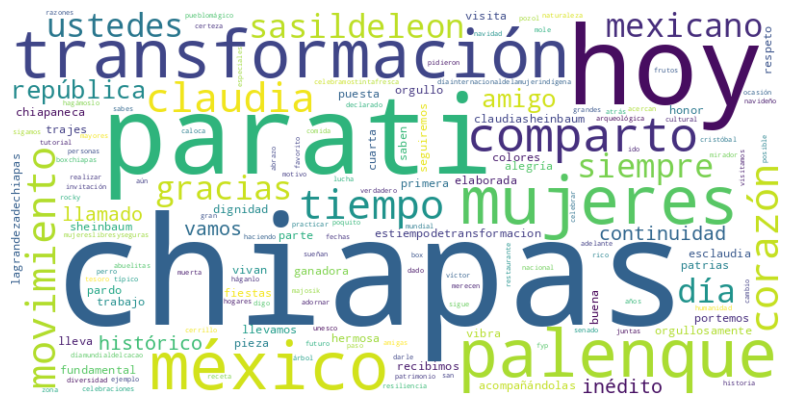

In [37]:
# Unir las palabras en un solo texto (separadas por espacios)
texto = " ".join(all_words)

# Crear el objeto WordCloud
nube_palabras = WordCloud(width=800, height=400, background_color='white').generate(texto)


# Mostrar la nube de palabras utilizando matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')  # Desactivar ejes
plt.show()

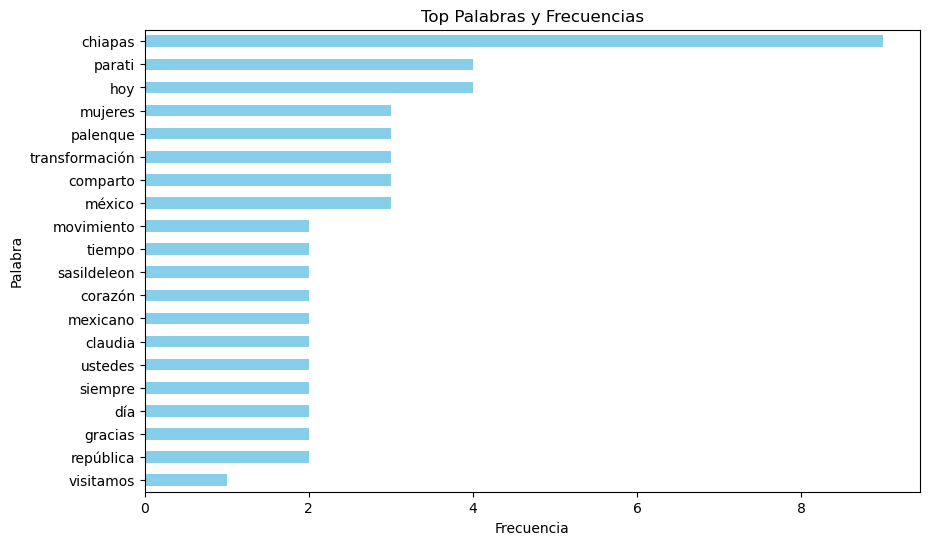

In [38]:
# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
top_words.plot(kind='barh', color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Top Palabras y Frecuencias')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la palabra con la frecuencia más alta en la parte superior
plt.show()


In [44]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Supongamos que tienes un corpus de textos en una lista llamada 'corpus_textos'
texts = tweets_tidy.tokens

punctuation = set(string.punctuation)

texts = [[word for word in doc if word not in stop_words and word not in punctuation] for doc in texts]

# Crear un diccionario de términos a partir del corpus
dictionary = corpora.Dictionary(texts)

# Crear una representación vectorial del corpus
corpus = [dictionary.doc2bow(text) for text in texts]

In [55]:
# Entrenar el modelo LDA
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=8)

# Obtener los temas y sus palabras clave
topics = lda_model.print_topics(num_words=5)

# Mostrar los temas y sus palabras clave
for topic in topics:
    print(topic)

(0, '0.062*"chiapas" + 0.026*"comparto" + 0.018*"mexicano" + 0.018*"república" + 0.018*"parati"')
(1, '0.034*"hoy" + 0.019*"mujeres" + 0.018*"méxico" + 0.018*"siempre" + 0.018*"palenque"')
(2, '0.016*"chiapas" + 0.013*"palenque" + 0.013*"transformación" + 0.013*"gracias" + 0.013*"5"')


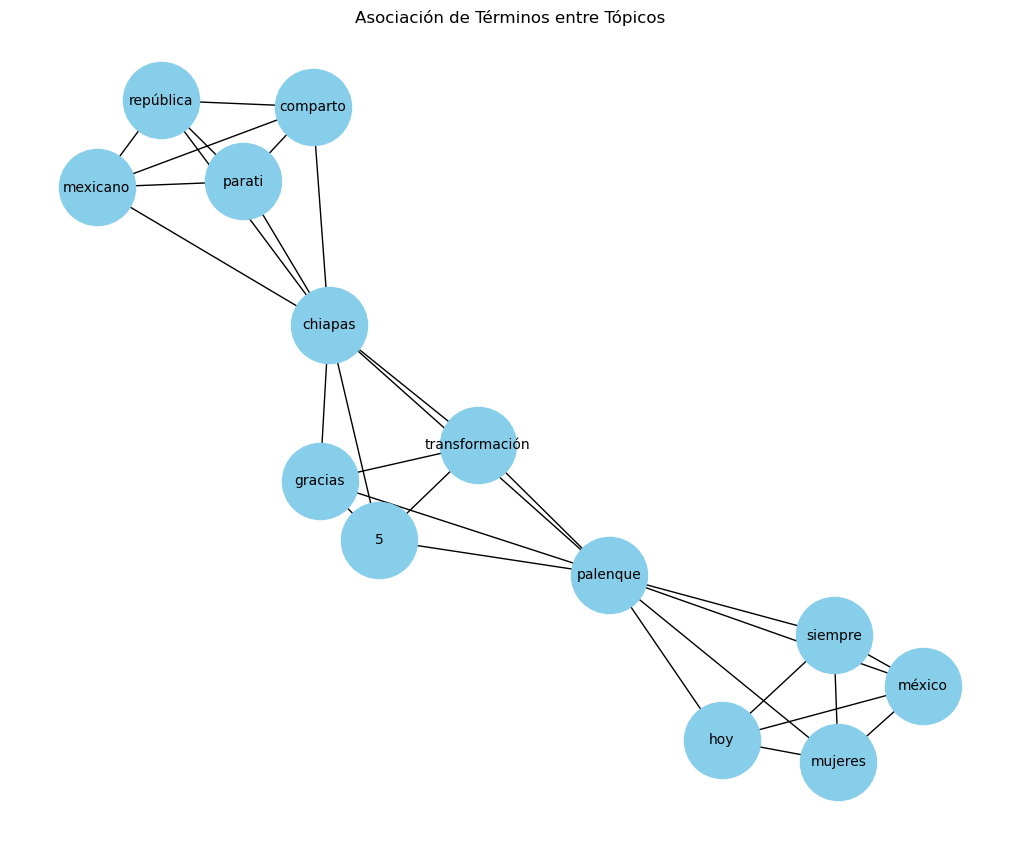

In [56]:
import networkx as nx
import matplotlib.pyplot as plt


# Crear un grafo de red
G = nx.Graph()

# Procesar los tópicos y sus palabras clave para identificar asociaciones
for topic_id, topic_words in topics:
    # Dividir las palabras clave en términos individuales
    terms = [term.split('*')[1].strip('"') for term in topic_words.split(' + ')]
    
    # Agregar una arista entre todos los términos del tópico
    for i in range(len(terms)):
        for j in range(i + 1, len(terms)):
            term1, term2 = terms[i], terms[j]
            G.add_edge(term1, term2, topic=topic_id)

# Dibujar el gráfico de red
pos = nx.spring_layout(G, k=0.3, iterations=50)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=3000, node_color='skyblue', font_color='black')

# Mostrar el gráfico de red
plt.title('Asociación de Términos entre Tópicos')
plt.show()

In [76]:
import re

tweets_tidy['texto'] = tweets_tidy['texto'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))

# Función para obtener el sentimiento de un texto
def obtener_sentimiento(texto):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(texto)["compound"]

# Aplicar la función a la columna "texto" y crear una nueva columna "sentimiento"
tweets_tidy["sentimiento"] = tweets_tidy["texto"].apply(obtener_sentimiento)
tweets_tidy.to_csv("tiktok_sentiment_posts.csv")

In [77]:
import plotly.graph_objects as go

####################################
# Contar la cantidad de sentimientos negativos, neutros y positivos
negativos = tweets_tidy[tweets_tidy["sentimiento"] < 0].count().values[0]
neutros = tweets_tidy[tweets_tidy["sentimiento"] == 0].count().values[0]
positivos = tweets_tidy[tweets_tidy["sentimiento"] > 0].count().values[0]

# Crear la gráfica de pastel
labels = ["Negativos", "Neutros", "Positivos"]
values = [negativos, neutros, positivos]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])

fig.write_html("pie.html")
# Mostrar la gráfica
fig.show()